<a href="https://colab.research.google.com/github/Sankari-Prem/Task-7/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3

# Connect to SQLite database (will create if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

# Sample data
data = [
    ('Apples', 10, 2.0),
    ('Bananas', 20, 1.0),
    ('Oranges', 15, 1.5),
    ('Apples', 5, 2.0),
    ('Bananas', 10, 1.0)
]

# Insert data into table
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", data)

# Save and close
conn.commit()
conn.close()

print("sales_data.db created successfully with sample data.")


sales_data.db created successfully with sample data.


Sales Summary:
   product  total_qty  revenue
0   Apples         15     30.0
1  Bananas         30     30.0
2  Oranges         15     22.5


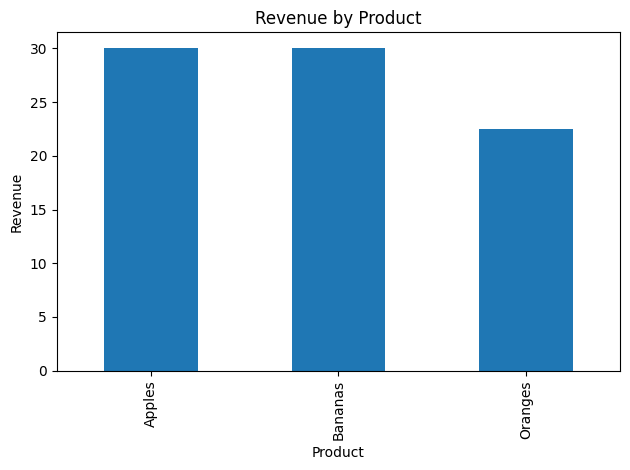

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue per product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

# Execute query and load result into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display result
print("Sales Summary:")
print(df)

# Plotting bar chart of revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
